# Feature Engineering Project

In [6]:
import pandas as pd

In [7]:
df=pd.read_csv("AMES LOWA.csv")

In [8]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [9]:
df.shape

(1460, 81)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
df.isna().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 81, dtype: bool

In [12]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [13]:
df.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

## Seperating the data set into numerical and categorical

In [14]:
df_n=df.select_dtypes(exclude="O")

In [15]:
df_n

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [16]:
df_n.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchebvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
df1=df_n.drop(columns = ["Id", "MSSubClass", "OverallQual", "OverallCond"])

In [18]:
df1

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,...,349,0,0,0,0,0,0,2,2010,210000
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,...,0,60,0,0,0,0,2500,5,2010,266500
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,...,366,0,112,0,0,0,0,4,2010,142125


""" ID and MSSubClass are nominal variable
OverallQual and OverallCond are ordinal variable which shall be dropped"""

In [19]:
df_c=df.select_dtypes(include="O")

In [20]:
df_c

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## EDA OF NUMERICAL VARIABLES

# Missing Value Treatment of Numerical Variables

In [21]:
df2=df1.interpolate(method="linear", limit_direction="forward")

In [22]:
df2

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,...,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,...,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,...,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,...,349,0,0,0,0,0,0,2,2010,210000
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,...,0,60,0,0,0,0,2500,5,2010,266500
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,...,366,0,112,0,0,0,0,4,2010,142125


In [23]:
df2.isna().any()

LotFrontage      False
LotArea          False
YearBuilt        False
YearRemodAdd     False
MasVnrArea       False
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
BsmtFullBath     False
BsmtHalfBath     False
FullBath         False
HalfBath         False
BedroomAbvGr     False
KitchebvGr       False
TotRmsAbvGrd     False
Fireplaces       False
GarageYrBlt      False
GarageCars       False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
MoSold           False
YrSold           False
SalePrice        False
dtype: bool

In [24]:
df2.isna().sum()

LotFrontage      0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchebvGr       0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

## Skewness and Distribution

In [25]:
df2.skew()

LotFrontage       2.116205
LotArea          12.207688
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.671519
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchebvGr        4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.639428
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
dtype: float64

In [26]:
df2.kurt()

LotFrontage       17.842589
LotArea          203.243271
YearBuilt         -0.439552
YearRemodAdd      -1.272245
MasVnrArea        10.115169
BsmtFinSF1        11.118236
BsmtFinSF2        20.113338
BsmtUnfSF          0.474994
TotalBsmtSF       13.250483
1stFlrSF           5.745841
2ndFlrSF          -0.553464
LowQualFinSF      83.234817
GrLivArea          4.895121
BsmtFullBath      -0.839098
BsmtHalfBath      16.396642
FullBath          -0.857043
HalfBath          -1.076927
BedroomAbvGr       2.230875
KitchebvGr        21.532404
TotRmsAbvGrd       0.880762
Fireplaces        -0.217237
GarageYrBlt       -0.392406
GarageCars         0.220998
GarageArea         0.917067
WoodDeckSF         2.992951
OpenPorchSF        8.490336
EnclosedPorch     10.430766
3SsnPorch        123.662379
ScreenPorch       18.439068
PoolArea         223.268499
MiscVal          701.003342
MoSold            -0.404109
YrSold            -1.190601
SalePrice          6.536282
dtype: float64

## Correlation Matrix and HEAT MAP

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
matrix=df2.corr().round(2)

In [29]:
matrix

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.00,0.28,0.11,0.07,0.16,0.20,0.04,0.12,0.34,0.39,...,0.07,0.12,-0.01,0.05,0.04,0.16,-0.01,0.01,0.01,0.31
LotArea,0.28,1.00,0.01,0.01,0.10,0.21,0.11,-0.00,0.26,0.30,...,0.17,0.08,-0.02,0.02,0.04,0.08,0.04,0.00,-0.01,0.26
YearBuilt,0.11,0.01,1.00,0.59,0.31,0.25,-0.05,0.15,0.39,0.28,...,0.22,0.19,-0.39,0.03,-0.05,0.00,-0.03,0.01,-0.01,0.52
YearRemodAdd,0.07,0.01,0.59,1.00,0.18,0.13,-0.07,0.18,0.29,0.24,...,0.21,0.23,-0.19,0.05,-0.04,0.01,-0.01,0.02,0.04,0.51
MasVnrArea,0.16,0.10,0.31,0.18,1.00,0.26,-0.07,0.11,0.36,0.34,...,0.16,0.12,-0.11,0.02,0.06,0.01,-0.03,-0.01,-0.01,0.47
BsmtFinSF1,0.20,0.21,0.25,0.13,0.26,1.00,-0.05,-0.50,0.52,0.45,...,0.20,0.11,-0.10,0.03,0.06,0.14,0.00,-0.02,0.01,0.39
BsmtFinSF2,0.04,0.11,-0.05,-0.07,-0.07,-0.05,1.00,-0.21,0.10,0.10,...,0.07,0.00,0.04,-0.03,0.09,0.04,0.00,-0.02,0.03,-0.01
BsmtUnfSF,0.12,-0.00,0.15,0.18,0.11,-0.50,-0.21,1.00,0.42,0.32,...,-0.01,0.13,-0.00,0.02,-0.01,-0.04,-0.02,0.03,-0.04,0.21
TotalBsmtSF,0.34,0.26,0.39,0.29,0.36,0.52,0.10,0.42,1.00,0.82,...,0.23,0.25,-0.10,0.04,0.08,0.13,-0.02,0.01,-0.01,0.61
1stFlrSF,0.39,0.30,0.28,0.24,0.34,0.45,0.10,0.32,0.82,1.00,...,0.24,0.21,-0.07,0.06,0.09,0.13,-0.02,0.03,-0.01,0.61


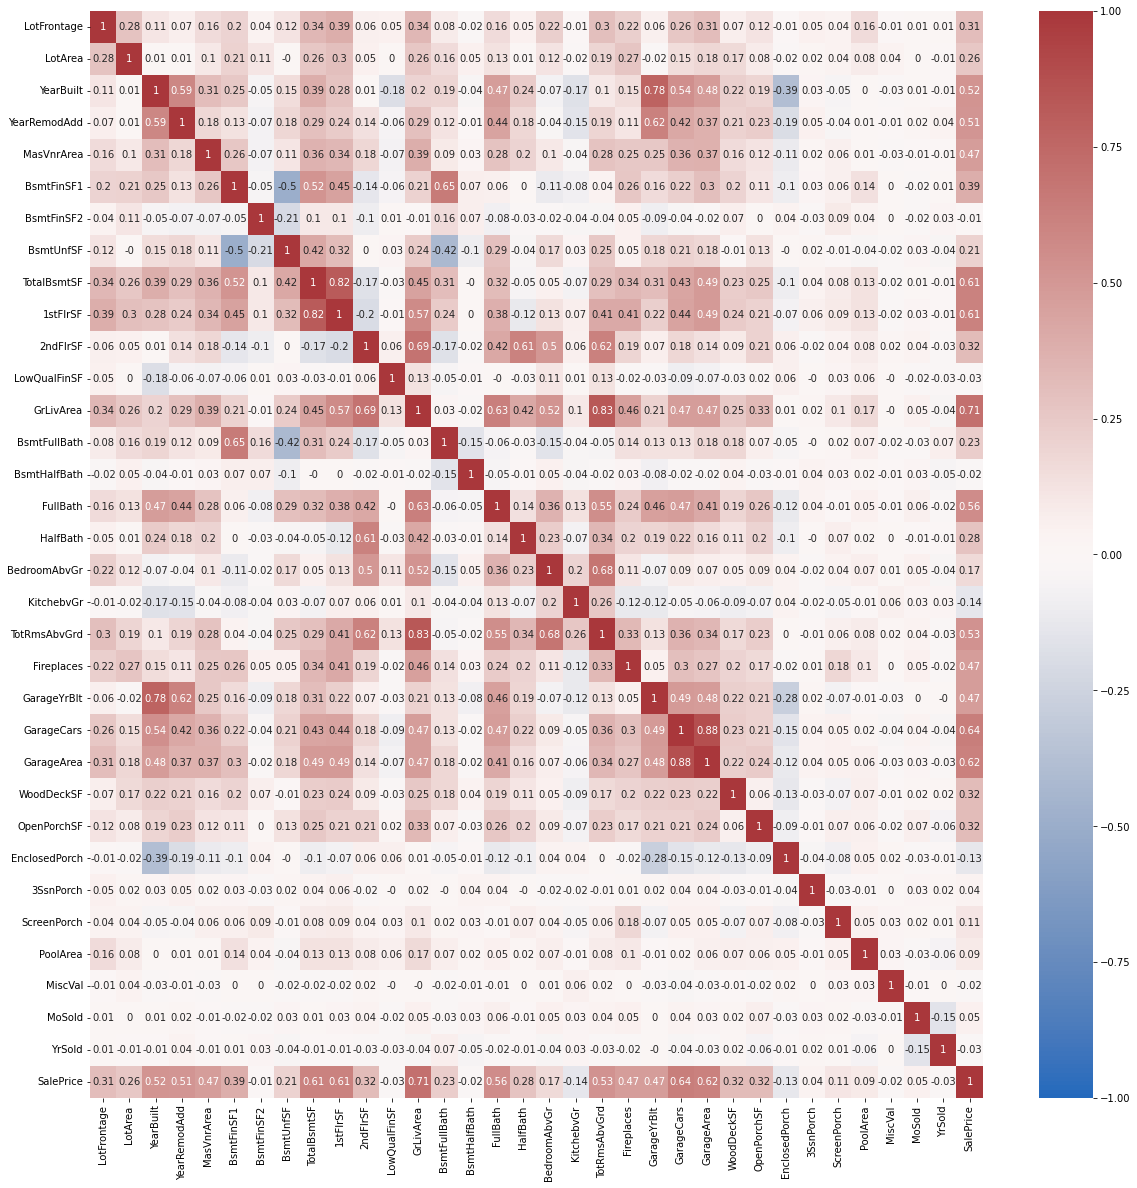

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(matrix, annot=True, vmin=-1, vmax=1, center=0, cmap="vlag")
plt.show()

In [31]:
import numpy as np

In [32]:
mask=np.triu(np.ones_like(matrix, dtype=bool))

In [33]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

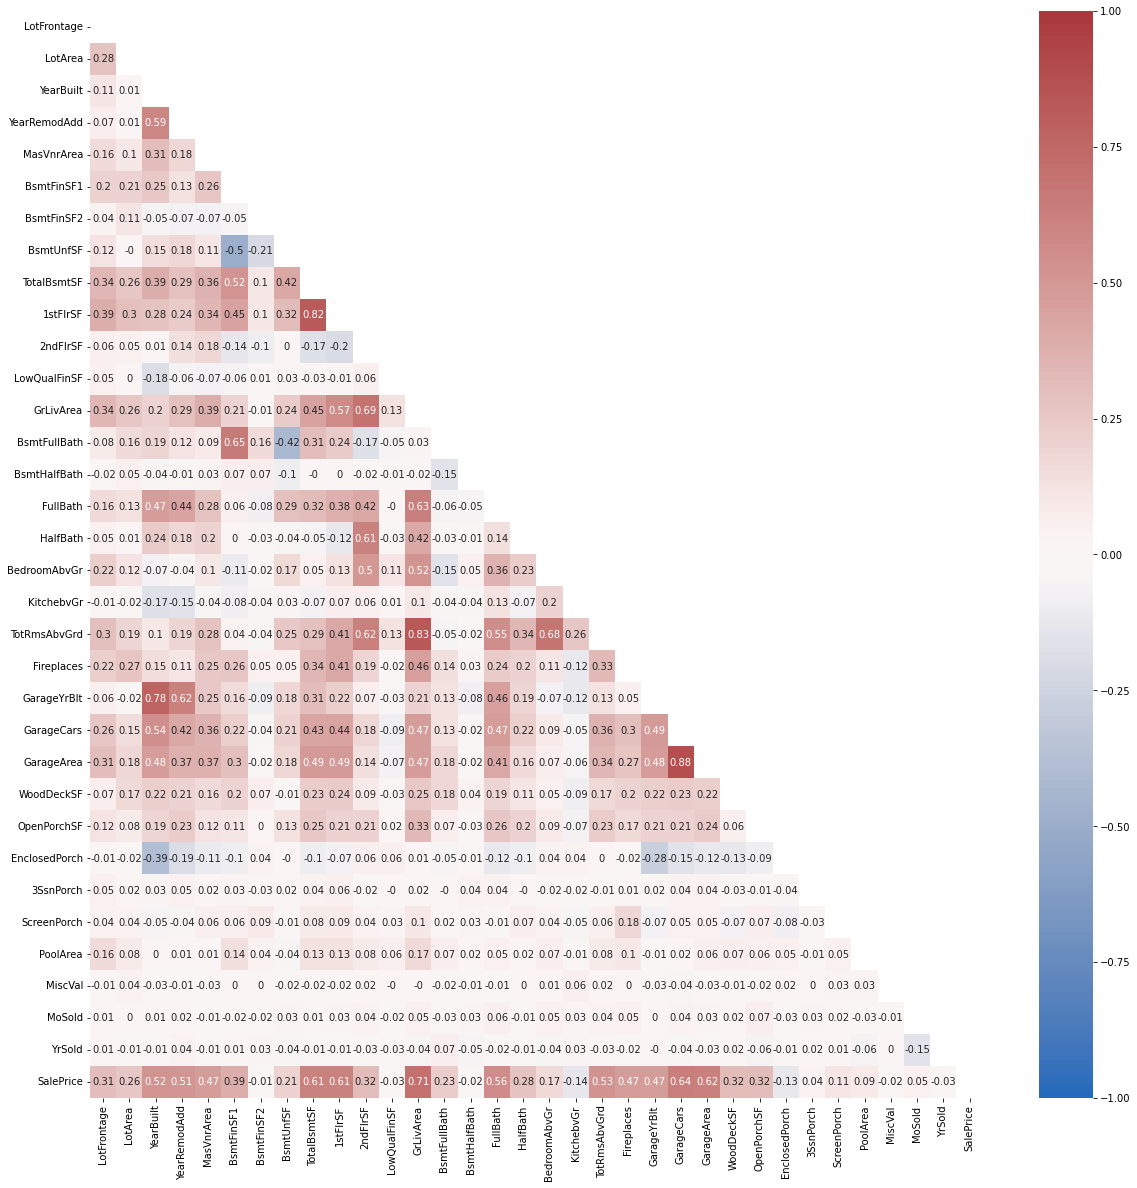

In [34]:
plt.figure(figsize=(20,20))
sns.heatmap(matrix, annot=True, vmin=-1, vmax=1, center=0, cmap="vlag", mask=mask)
plt.show()

## Selecting the strong positive correlation with target variable SalePrice

In [35]:
matrix=df2.corr()
matrix=matrix.unstack()
matrix=matrix[abs(matrix)>=0.7]

In [36]:
matrix

LotFrontage    LotFrontage      1.000000
LotArea        LotArea          1.000000
YearBuilt      YearBuilt        1.000000
               GarageYrBlt      0.775012
YearRemodAdd   YearRemodAdd     1.000000
MasVnrArea     MasVnrArea       1.000000
BsmtFinSF1     BsmtFinSF1       1.000000
BsmtFinSF2     BsmtFinSF2       1.000000
BsmtUnfSF      BsmtUnfSF        1.000000
TotalBsmtSF    TotalBsmtSF      1.000000
               1stFlrSF         0.819530
1stFlrSF       TotalBsmtSF      0.819530
               1stFlrSF         1.000000
2ndFlrSF       2ndFlrSF         1.000000
LowQualFinSF   LowQualFinSF     1.000000
GrLivArea      GrLivArea        1.000000
               TotRmsAbvGrd     0.825489
               SalePrice        0.708624
BsmtFullBath   BsmtFullBath     1.000000
BsmtHalfBath   BsmtHalfBath     1.000000
FullBath       FullBath         1.000000
HalfBath       HalfBath         1.000000
BedroomAbvGr   BedroomAbvGr     1.000000
KitchebvGr     KitchebvGr       1.000000
TotRmsAbvGrd   G

""" Strong Positive Correlation: SalePrice with GrLivArea
           
           Positive Corelation: Saleprice with TotalBsmtSF
                                SalePrice with 1stFlrSF

    Negative Correlation with target variable : KitchebvGr and Enclosed Porch"""
    
    """ But this KitchebGr negative correlation variable have a discrete value so instead of considering a discrete value for numerical variables plotting i instead consider BsmtUnfSF"""

# Pairplot for Distribution and Density

In [37]:
df3=df2[["YearBuilt", "GrLivArea", "TotalBsmtSF", "1stFlrSF", "BsmtUnfSF", "EnclosedPorch", "SalePrice", "YrSold"]]

In [38]:
df3

,YearBuilt,GrLivArea,TotalBsmtSF,1stFlrSF,BsmtUnfSF,EnclosedPorch,SalePrice,YrSold
0,2003,1710,856,856,150,0,208500,2008
1,1976,1262,1262,1262,284,0,181500,2007
2,2001,1786,920,920,434,0,223500,2008
3,1915,1717,756,961,540,272,140000,2006
4,2000,2198,1145,1145,490,0,250000,2008
...,...,...,...,...,...,...,...,...
1455,1999,1647,953,953,953,0,175000,2007
1456,1978,2073,1542,2073,589,0,210000,2010
1457,1941,2340,1152,1188,877,0,266500,2010
1458,1950,1078,1078,1078,0,112,142125,2010


In [39]:
df3.describe()

,YearBuilt,GrLivArea,TotalBsmtSF,1stFlrSF,BsmtUnfSF,EnclosedPorch,SalePrice,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1971.267808,1515.463699,1057.429452,1162.626712,567.240411,21.954110,180921.195890,2007.815753
std,30.202904,525.480383,438.705324,386.587738,441.866955,61.119149,79442.502883,1.328095
min,1872.000000,334.000000,0.000000,334.000000,0.000000,0.000000,34900.000000,2006.000000
25%,1954.000000,1129.500000,795.750000,882.000000,223.000000,0.000000,129975.000000,2007.000000
50%,1973.000000,1464.000000,991.500000,1087.000000,477.500000,0.000000,163000.000000,2008.000000
75%,2000.000000,1776.750000,1298.250000,1391.250000,808.000000,0.000000,214000.000000,2009.000000
max,2010.000000,5642.000000,6110.000000,4692.000000,2336.000000,552.000000,755000.000000,2010.000000


"""" As i can see that even though the enclosed porch and BsmtUnfSF is a continuous variable its not giving me the insights, So dropinng this. And the variable TotalBsmtSF covering the values for BsmtUnfSF."""

In [40]:
df3_N=df3.drop(columns=["EnclosedPorch", "BsmtUnfSF"])

In [41]:
df3_N

,YearBuilt,GrLivArea,TotalBsmtSF,1stFlrSF,SalePrice,YrSold
0,2003,1710,856,856,208500,2008
1,1976,1262,1262,1262,181500,2007
2,2001,1786,920,920,223500,2008
3,1915,1717,756,961,140000,2006
4,2000,2198,1145,1145,250000,2008
...,...,...,...,...,...,...
1455,1999,1647,953,953,175000,2007
1456,1978,2073,1542,2073,210000,2010
1457,1941,2340,1152,1188,266500,2010
1458,1950,1078,1078,1078,142125,2010


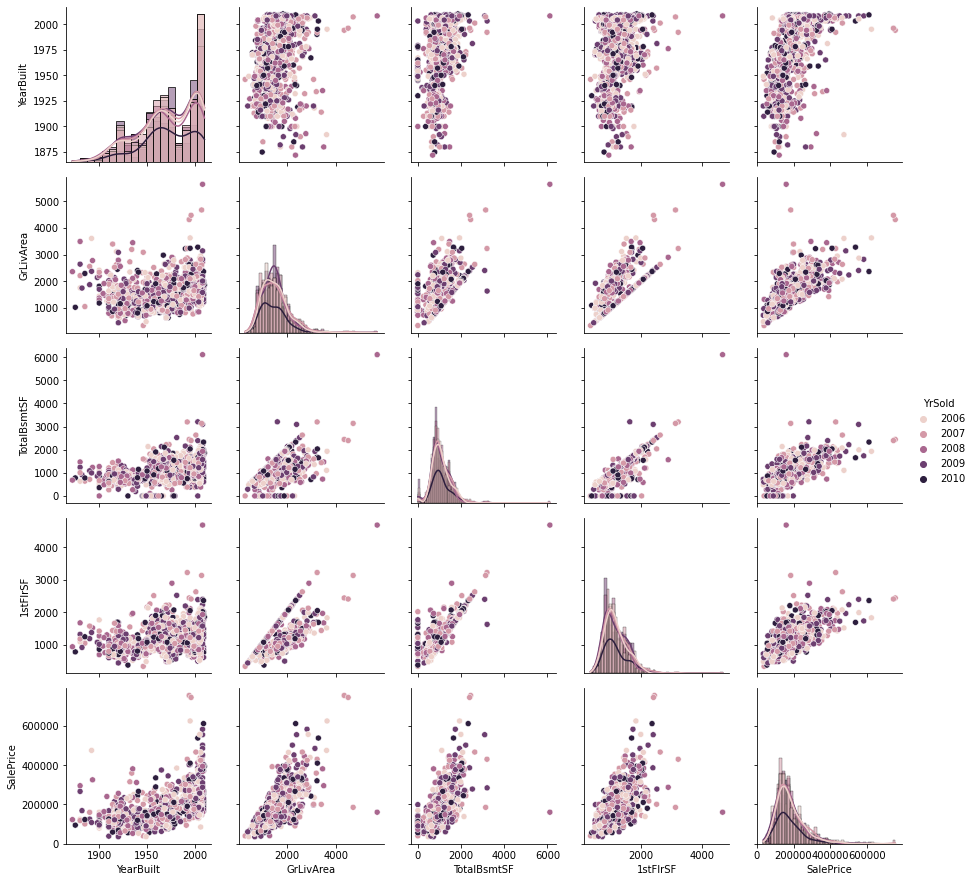

In [105]:
g=sns.PairGrid(df3_N, hue="YrSold", vars=["YearBuilt", "GrLivArea", "TotalBsmtSF", "1stFlrSF", "SalePrice"])
g.map_diag(sns.histplot, kde=True)
g.map_offdiag(sns.scatterplot)
g.add_legend()

## As we can see the houses are sold mostly between year 2006 to 2010 and the target variable SalePrice distribution is positively skewed

# EDA OF CATEGORICAL VARIABLES

# Concatenate above found nominal and ordinal variables

In [42]:
df_c

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [43]:
df4=df[["MSSubClass", "OverallQual", "OverallCond"]]

In [44]:
df4

,MSSubClass,OverallQual,OverallCond
0,60,7,5
1,20,6,8
2,60,7,5
3,70,7,5
4,60,8,5
...,...,...,...
1455,60,6,5
1456,20,6,6
1457,70,7,9
1458,20,5,6


In [45]:
df5=pd.concat([df_c, df4], axis=1)

In [46]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [47]:
df5.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Y,NaN,NaN,NaN,WD,Normal,60,7,5
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Y,NaN,NaN,NaN,WD,Normal,20,6,8
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Y,NaN,NaN,NaN,WD,Normal,60,7,5
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,TA,Y,NaN,NaN,NaN,WD,Abnorml,70,7,5
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,Y,NaN,NaN,NaN,WD,Normal,60,8,5


In [48]:
df5.tail()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,OverallQual,OverallCond
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Y,NaN,NaN,NaN,WD,Normal,60,6,5
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,TA,Y,NaN,MnPrv,NaN,WD,Normal,20,6,6
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,TA,Y,NaN,GdPrv,Shed,WD,Normal,70,7,9
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,...,TA,Y,NaN,NaN,NaN,WD,Normal,20,5,6
1459,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,...,TA,Y,NaN,NaN,NaN,WD,Normal,20,5,6


In [49]:
df5.isna().any()

MSZoning         False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinType2      True
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
KitchenQual      False
Functiol         False
FireplaceQu       True
GarageType        True
GarageFinish      True
GarageQual        True
GarageCond        True
PavedDrive       False
PoolQC            True
Fence             True
MiscFeature       True
SaleType         False
SaleCondition    False
MSSubClass 

# Missing Value Treatment of Categorical Variables

In [50]:
df5.isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functiol            0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
MSSubClass          0
OverallQual         0
OverallCon

In [51]:
df5["Alley"]=df5["Alley"].fillna(0)

In [52]:
df5["MasVnrType"]=df5["MasVnrType"].fillna(method="ffill")

In [53]:
df5["BsmtQual"]=df5["BsmtQual"].fillna(0)

In [54]:
df5["BsmtCond"]=df5["BsmtCond"].fillna(0)

In [55]:
df5["BsmtExposure"]=df5["BsmtExposure"].fillna(0)

In [56]:
df5["BsmtFinType1"]=df5["BsmtFinType1"].fillna(0)

In [57]:
df5["BsmtFinType2"]=df5["BsmtFinType2"].fillna(0)

In [58]:
df5["Electrical"]=df5["Electrical"].fillna(method="bfill")

In [59]:
df5["FireplaceQu"]=df5["FireplaceQu"].fillna(0)

In [60]:
df5["GarageType"]=df5["GarageType"].fillna(0)

In [61]:
df5["GarageFinish"]=df5["GarageFinish"].fillna(0)

In [62]:
df5["GarageQual"]=df5["GarageQual"].fillna(0)

In [63]:
df5["GarageCond"]=df5["GarageCond"].fillna(0)

In [64]:
df5["PoolQC"]=df5["PoolQC"].fillna(0)

In [65]:
df5["Fence"]=df5["Fence"].fillna(0)

In [66]:
df5["MiscFeature"]=df5["MiscFeature"].fillna(0)

In [67]:
df5.isna().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functiol         0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
MSSubClass       0
OverallQual      0
OverallCond      0
dtype: int64

In [68]:
df5.isna().any()

MSZoning         False
Street           False
Alley            False
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinType2     False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
KitchenQual      False
Functiol         False
FireplaceQu      False
GarageType       False
GarageFinish     False
GarageQual       False
GarageCond       False
PavedDrive       False
PoolQC           False
Fence            False
MiscFeature      False
SaleType         False
SaleCondition    False
MSSubClass 

### There were only 2 categorical variables which had missing values; rest all presence of null values in categorical variables means those features are not provided.

## Drop columns as they have same ordinal or nominal values

In [69]:
df6=df5.drop(columns=["Condition2", "OverallCond", "Exterior2nd", "ExterCond", "BsmtCond", "BsmtFinType2", "GarageCond"])

In [70]:
df6

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,OverallQual
0,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,Y,0,0,0,WD,Normal,60,7
1,RL,Pave,0,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,RFn,TA,Y,0,0,0,WD,Normal,20,6
2,RL,Pave,0,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,RFn,TA,Y,0,0,0,WD,Normal,60,7
3,RL,Pave,0,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Unf,TA,Y,0,0,0,WD,Abnorml,70,7
4,RL,Pave,0,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,RFn,TA,Y,0,0,0,WD,Normal,60,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,RFn,TA,Y,0,0,0,WD,Normal,60,6
1456,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Unf,TA,Y,0,MnPrv,0,WD,Normal,20,6
1457,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,RFn,TA,Y,0,GdPrv,Shed,WD,Normal,70,7
1458,RL,Pave,0,Reg,Lvl,AllPub,Inside,Gtl,mes,Norm,...,Unf,TA,Y,0,0,0,WD,Normal,20,5


In [71]:
df6.shape

(1460, 39)

## Split List into two parts

In [72]:
df6.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'MasVnrType',
       'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functiol', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition', 'MSSubClass', 'OverallQual'],
      dtype='object')

In [73]:
cat_var1= ("MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "MasVnrType", "ExterQual", "Foundation", "BsmtQual", "BsmtExposure", "BsmtFinType1", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functiol", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "PavedDrive", "PoolQC", "Fence", "MiscFeature", "SaleType", "SaleCondition", "MSSubClass", "OverallQual")

In [74]:
cat_var2= ("MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "BldgType", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "MasVnrType", "ExterQual", "Foundation", "BsmtQual", "BsmtExposure", "BsmtFinType1", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functiol", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "PavedDrive", "PoolQC", "Fence", "MiscFeature", "SaleType", "SaleCondition", "MSSubClass", "OverallQual")

# ChiSquare Test of Independence

In [75]:
from itertools import product

In [76]:
cat_var_prod=list(product(cat_var1, cat_var2, repeat=1))

In [77]:
cat_var_prod

[('MSZoning', 'MSZoning'),
 ('MSZoning', 'Street'),
 ('MSZoning', 'Alley'),
 ('MSZoning', 'LotShape'),
 ('MSZoning', 'LandContour'),
 ('MSZoning', 'Utilities'),
 ('MSZoning', 'LotConfig'),
 ('MSZoning', 'LandSlope'),
 ('MSZoning', 'Neighborhood'),
 ('MSZoning', 'Condition1'),
 ('MSZoning', 'BldgType'),
 ('MSZoning', 'HouseStyle'),
 ('MSZoning', 'RoofStyle'),
 ('MSZoning', 'RoofMatl'),
 ('MSZoning', 'Exterior1st'),
 ('MSZoning', 'MasVnrType'),
 ('MSZoning', 'ExterQual'),
 ('MSZoning', 'Foundation'),
 ('MSZoning', 'BsmtQual'),
 ('MSZoning', 'BsmtExposure'),
 ('MSZoning', 'BsmtFinType1'),
 ('MSZoning', 'Heating'),
 ('MSZoning', 'HeatingQC'),
 ('MSZoning', 'CentralAir'),
 ('MSZoning', 'Electrical'),
 ('MSZoning', 'KitchenQual'),
 ('MSZoning', 'Functiol'),
 ('MSZoning', 'FireplaceQu'),
 ('MSZoning', 'GarageType'),
 ('MSZoning', 'GarageFinish'),
 ('MSZoning', 'GarageQual'),
 ('MSZoning', 'PavedDrive'),
 ('MSZoning', 'PoolQC'),
 ('MSZoning', 'Fence'),
 ('MSZoning', 'MiscFeature'),
 ('MSZoning

# Create an empty variable and pick only the p value

In [78]:
import scipy.stats as ss
from scipy.stats import chi2_contingency

In [79]:
result=[]
for i in cat_var_prod:
    if i[0]!=i[1]:
        result.append((i[0], i[1], list(ss.chi2_contingency(pd.crosstab(df6[i[0]], df6[i[1]]))) [1]))
        result

In [80]:
chi_test_output=pd.DataFrame(result, columns=["var1","var2", "coef"])

In [81]:
pvalue = chi_test_output

In [82]:
print(pvalue.to_markdown())

|      | var1          | var2          |         coef |
|-----:|:--------------|:--------------|-------------:|
|    0 | MSZoning      | Street        | 1.29333e-19  |
|    1 | MSZoning      | Alley         | 6.37096e-92  |
|    2 | MSZoning      | LotShape      | 1.35963e-18  |
|    3 | MSZoning      | LandContour   | 6.22139e-08  |
|    4 | MSZoning      | Utilities     | 0.991747     |
|    5 | MSZoning      | LotConfig     | 0.000846239  |
|    6 | MSZoning      | LandSlope     | 0.00331925   |
|    7 | MSZoning      | Neighborhood  | 0            |
|    8 | MSZoning      | Condition1    | 0.00125261   |
|    9 | MSZoning      | BldgType      | 1.74703e-38  |
|   10 | MSZoning      | HouseStyle    | 6.69732e-33  |
|   11 | MSZoning      | RoofStyle     | 0.000160499  |
|   12 | MSZoning      | RoofMatl      | 0.999997     |
|   13 | MSZoning      | Exterior1st   | 1.08013e-24  |
|   14 | MSZoning      | MasVnrType    | 1.66904e-07  |
|   15 | MSZoning      | ExterQual     | 3.21204

# As we can see that there are many categorical variables which are associated and have satistically significant value less than alpha 0.05

''' But some variables have significant impact viz., Neighbourhood, Foundation, BsmtFinType1, BasementQual, OverallQual, KitchenQual, ExterQual, GarageType, GarageQual''''

''' As the RoofMaterial and RoofStyle can be considered under Foundation we are dropping these'''

""" As i see the SaleCondition also have a impact on the SalePrice"""

# Count Plot of significant categorical variables

In [83]:
pd.crosstab(df6["BsmtQual"], df6["Neighborhood"])

Neighborhood,Blmngtn,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,...,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,mes
BsmtQual,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,3,1,0,0,11,1,1,...,0,2,0,2,4,0,0,0,0,10
Ex,2,0,0,0,1,8,3,5,3,0,...,48,0,0,0,1,14,9,11,1,0
Fa,0,0,0,3,0,0,3,6,0,1,...,0,19,0,0,1,0,0,0,0,2
Gd,15,2,0,4,13,131,17,21,71,1,...,29,7,4,10,48,72,16,22,8,21
TA,0,0,16,48,13,11,28,57,4,34,...,0,85,21,62,5,0,0,5,2,192


In [84]:
pd.crosstab(df6["OverallQual"], df6["BsmtQual"])

BsmtQual,0,Ex,Fa,Gd,TA
OverallQual,,,,,
1,1,0,1,0,0
2,0,0,0,0,3
3,6,0,2,0,12
4,13,0,8,16,79
5,15,2,14,64,302
6,1,7,8,165,193
7,1,18,2,247,51
8,0,40,0,121,7
9,0,38,0,5,0


In [85]:
pd.crosstab(df6["KitchenQual"], df6["OverallQual"])

OverallQual,1,2,3,4,5,6,7,8,9,10
KitchenQual,,,,,,,,,,
Ex,0,0,0,0,8,2,10,30,35,15
Fa,2,2,3,12,9,10,1,0,0,0
Gd,0,0,1,10,60,127,244,133,8,3
TA,0,1,16,94,320,235,64,5,0,0


In [86]:
pd.crosstab(df6["KitchenQual"], df6["ExterQual"])

ExterQual,Ex,Fa,Gd,TA
KitchenQual,,,,
Ex,42,0,47,11
Fa,0,8,0,31
Gd,8,0,408,170
TA,2,6,33,694


In [87]:
pd.crosstab(df6["Foundation"], df6["BsmtFinType1"])

BsmtFinType1,0,ALQ,BLQ,GLQ,LwQ,Rec,Unf
Foundation,,,,,,,
BrkTil,1,12,15,2,11,19,86
CBlock,9,161,119,79,50,107,109
PConc,3,47,14,334,12,7,230
Slab,24,0,0,0,0,0,0
Stone,0,0,0,1,0,0,5
Wood,0,0,0,2,1,0,0


In [88]:
pd.crosstab(df6["GarageType"], df6["GarageQual"])

GarageQual,0,Ex,Fa,Gd,Po,TA
GarageType,,,,,,
0,81,0,0,0,0,0
2Types,0,0,1,0,0,5
Attchd,0,0,6,9,0,855
Basment,0,0,2,0,0,17
BuiltIn,0,0,0,1,0,87
CarPort,0,0,2,0,0,7
Detchd,0,3,37,4,3,340


In [89]:
pd.crosstab( df6["Neighborhood"], df6["SaleCondition"])

SaleCondition,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Neighborhood,,,,,,
Blmngtn,0,0,0,0,12,5
Blueste,0,0,0,0,2,0
BrDale,3,0,0,1,12,0
BrkSide,3,0,0,1,54,0
ClearCr,3,0,0,0,24,1
CollgCr,3,0,0,0,129,18
Crawfor,3,0,2,2,43,1
Edwards,8,4,2,0,82,4
Gilbert,1,0,0,2,64,12


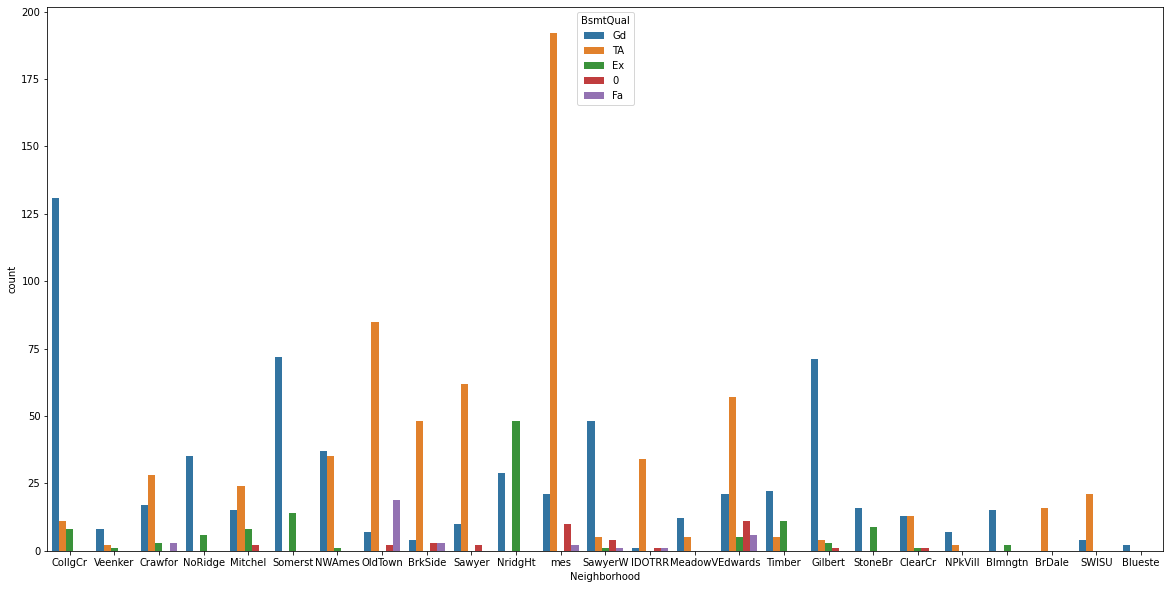

In [90]:
plt.figure(figsize = (20,10))
sns.countplot(data=df6, x="Neighborhood", hue="BsmtQual")
plt.show()

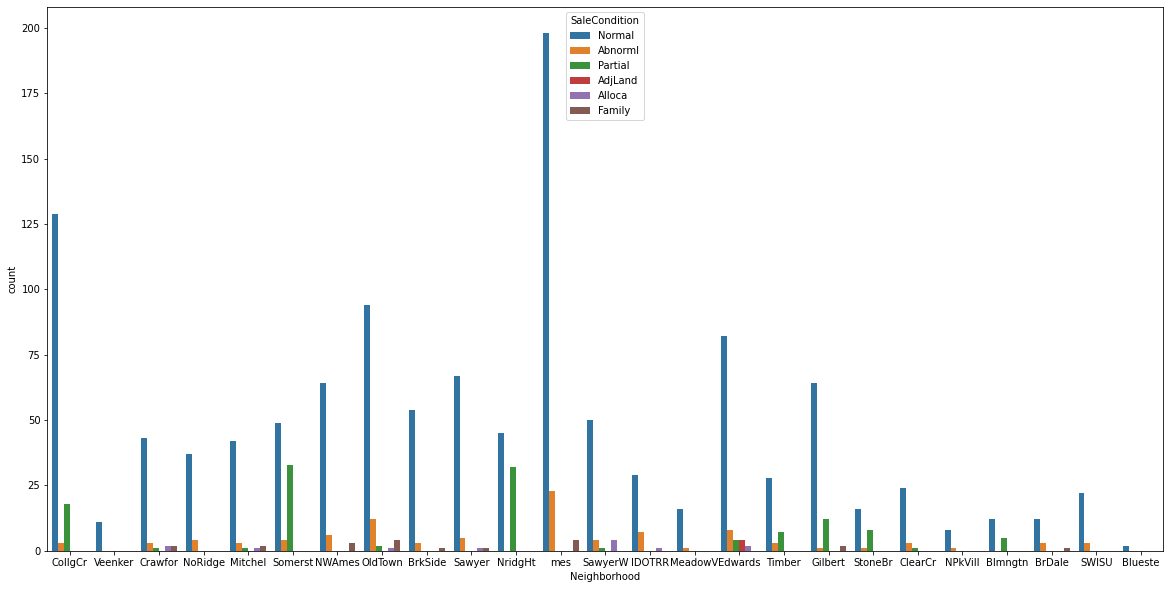

In [91]:
plt.figure(figsize = (20,10))
sns.countplot(data=df6, x="Neighborhood", hue="SaleCondition")
plt.show()

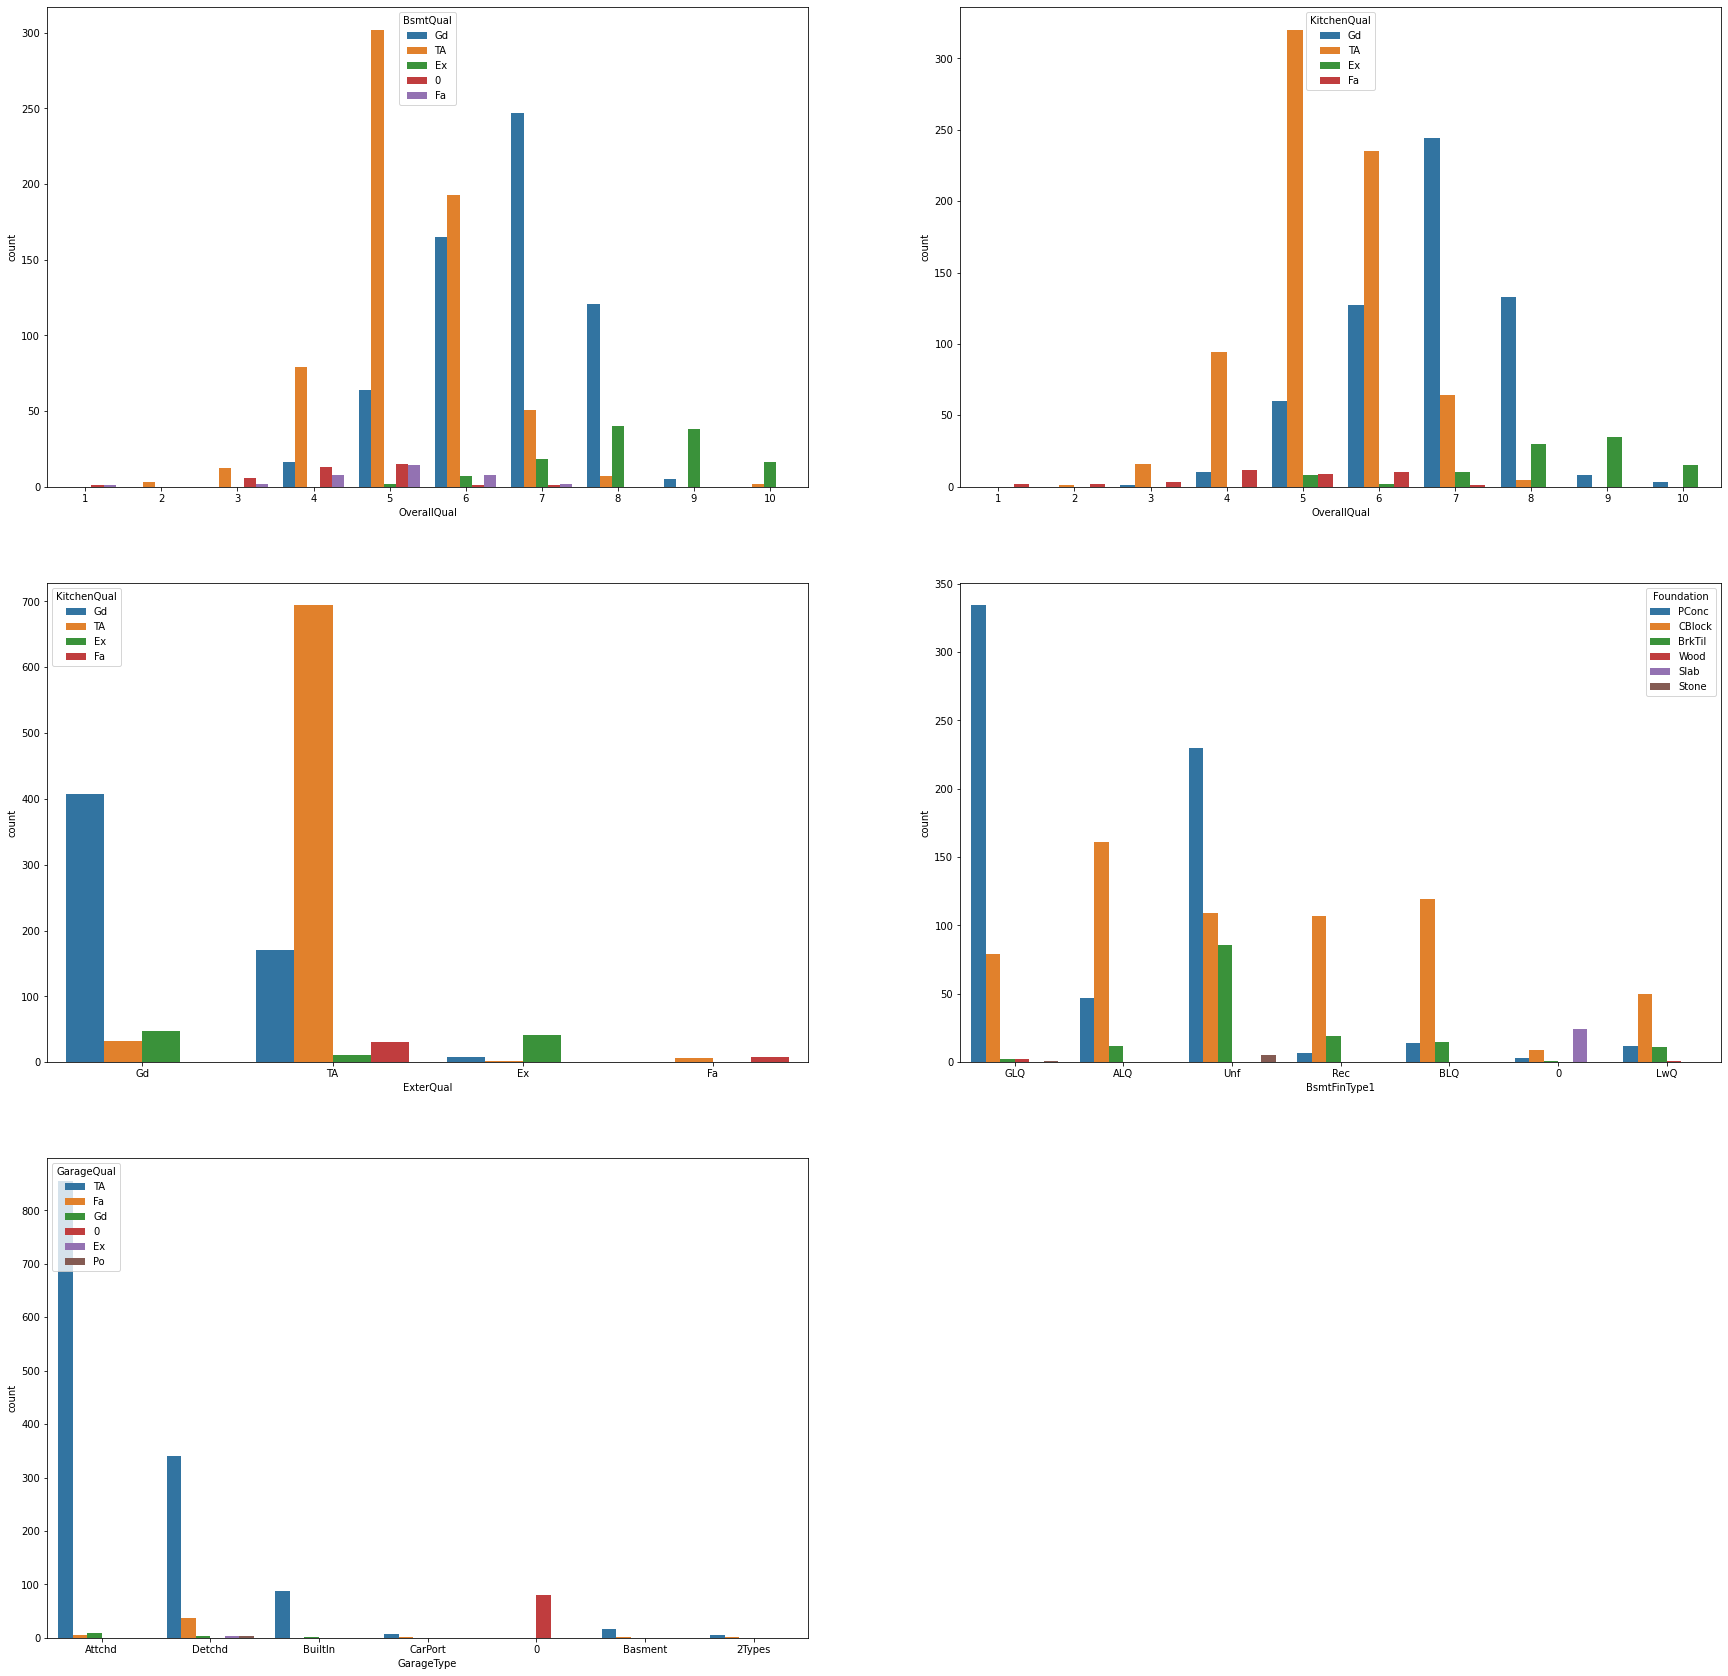

In [92]:
plt.figure(figsize = (30,30))
plt.subplot(3,2,1)
sns.countplot(data=df6, x="OverallQual", hue="BsmtQual")
plt.subplot(3,2,2)
sns.countplot(data=df6, x="OverallQual", hue="KitchenQual")
plt.subplot(3,2,3)
sns.countplot(data=df6, x="ExterQual", hue="KitchenQual")
plt.subplot(3,2,4)
sns.countplot(data=df6, x="BsmtFinType1", hue="Foundation")
plt.subplot(3,2,5)
sns.countplot(data=df6, x="GarageType", hue="GarageQual")
plt.show()

# New data set of significant numerical variables and categorical variables

In [93]:
df7=df6[["Neighborhood", "BsmtQual", "OverallQual", "KitchenQual", "ExterQual", "BsmtFinType1", "Foundation", "GarageType", "GarageQual", "SaleCondition"]]

In [94]:
df7

,Neighborhood,BsmtQual,OverallQual,KitchenQual,ExterQual,BsmtFinType1,Foundation,GarageType,GarageQual,SaleCondition
0,CollgCr,Gd,7,Gd,Gd,GLQ,PConc,Attchd,TA,Normal
1,Veenker,Gd,6,TA,TA,ALQ,CBlock,Attchd,TA,Normal
2,CollgCr,Gd,7,Gd,Gd,GLQ,PConc,Attchd,TA,Normal
3,Crawfor,TA,7,Gd,TA,ALQ,BrkTil,Detchd,TA,Abnorml
4,NoRidge,Gd,8,Gd,Gd,GLQ,PConc,Attchd,TA,Normal
...,...,...,...,...,...,...,...,...,...,...
1455,Gilbert,Gd,6,TA,TA,Unf,PConc,Attchd,TA,Normal
1456,NWAmes,Gd,6,TA,TA,ALQ,CBlock,Attchd,TA,Normal
1457,Crawfor,TA,7,Gd,Ex,GLQ,Stone,Attchd,TA,Normal
1458,mes,TA,5,Gd,TA,GLQ,CBlock,Attchd,TA,Normal


In [95]:
df8=df3_N[["GrLivArea", "TotalBsmtSF", "1stFlrSF", "SalePrice"]]

In [96]:
df8

,GrLivArea,TotalBsmtSF,1stFlrSF,SalePrice
0,1710,856,856,208500
1,1262,1262,1262,181500
2,1786,920,920,223500
3,1717,756,961,140000
4,2198,1145,1145,250000
...,...,...,...,...
1455,1647,953,953,175000
1456,2073,1542,2073,210000
1457,2340,1152,1188,266500
1458,1078,1078,1078,142125


In [97]:
df9=pd.concat([df8, df7], axis=1)

In [98]:
df9

,GrLivArea,TotalBsmtSF,1stFlrSF,SalePrice,Neighborhood,BsmtQual,OverallQual,KitchenQual,ExterQual,BsmtFinType1,Foundation,GarageType,GarageQual,SaleCondition
0,1710,856,856,208500,CollgCr,Gd,7,Gd,Gd,GLQ,PConc,Attchd,TA,Normal
1,1262,1262,1262,181500,Veenker,Gd,6,TA,TA,ALQ,CBlock,Attchd,TA,Normal
2,1786,920,920,223500,CollgCr,Gd,7,Gd,Gd,GLQ,PConc,Attchd,TA,Normal
3,1717,756,961,140000,Crawfor,TA,7,Gd,TA,ALQ,BrkTil,Detchd,TA,Abnorml
4,2198,1145,1145,250000,NoRidge,Gd,8,Gd,Gd,GLQ,PConc,Attchd,TA,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1647,953,953,175000,Gilbert,Gd,6,TA,TA,Unf,PConc,Attchd,TA,Normal
1456,2073,1542,2073,210000,NWAmes,Gd,6,TA,TA,ALQ,CBlock,Attchd,TA,Normal
1457,2340,1152,1188,266500,Crawfor,TA,7,Gd,Ex,GLQ,Stone,Attchd,TA,Normal
1458,1078,1078,1078,142125,mes,TA,5,Gd,TA,GLQ,CBlock,Attchd,TA,Normal


# Box Plot for Significant Numerical Variables

[]

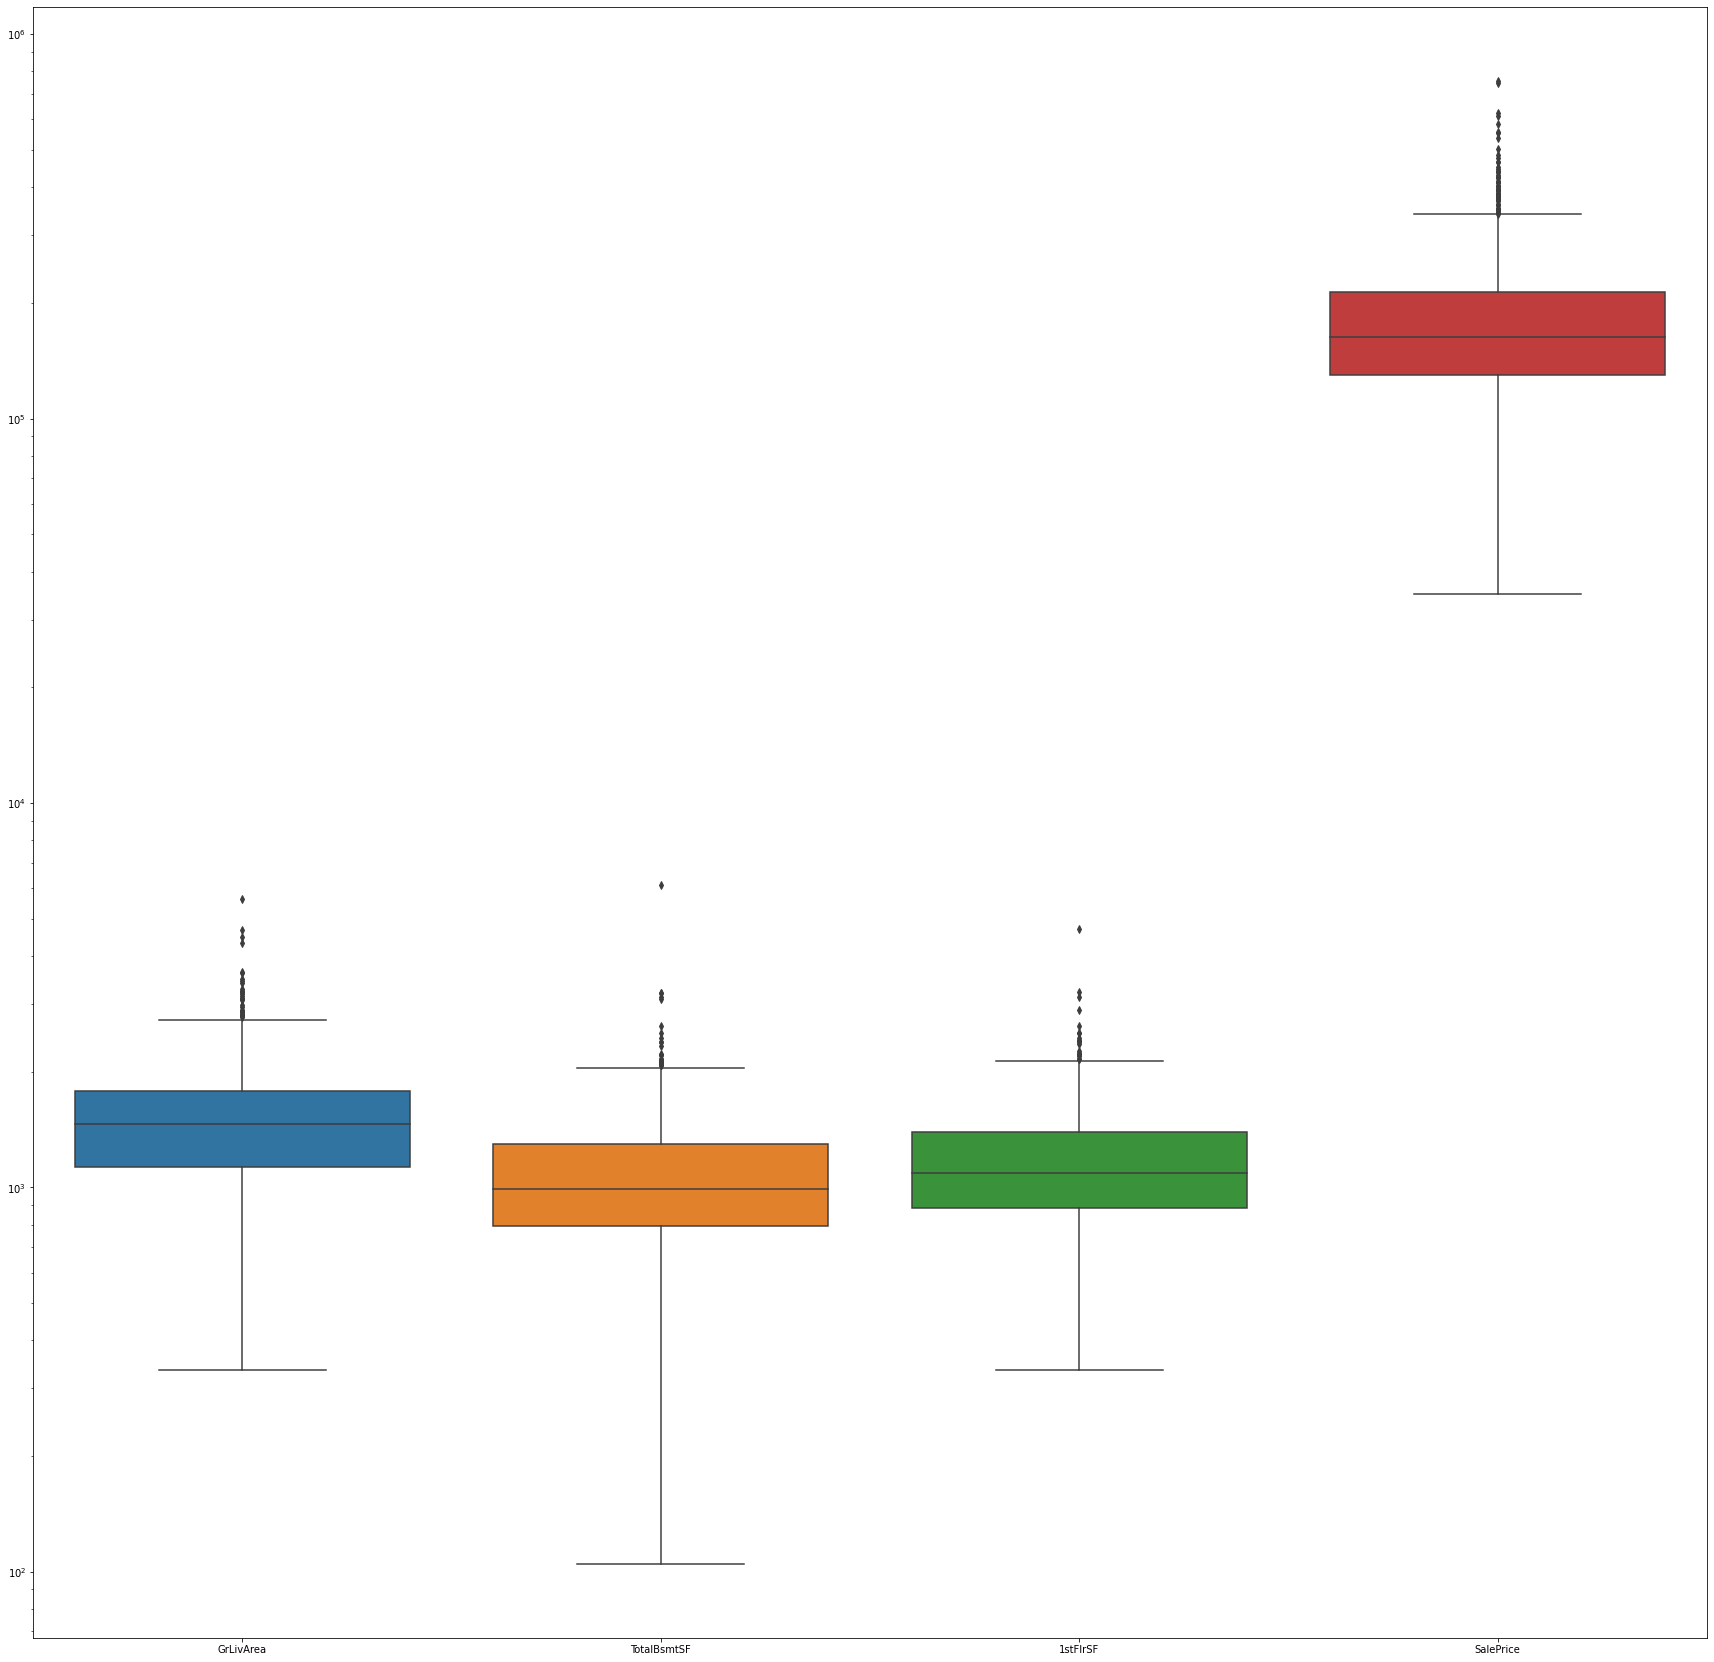

In [99]:
plt.figure(figsize=(30,30))
sns.boxplot(data=df9[["GrLivArea", "TotalBsmtSF", "1stFlrSF", "SalePrice"]])
plt.semilogy()

""" There are outliers present for every significant numerical variables but they all are on the maximum side. Means the data is positively skewed for significant numerical varaibles"""

# Box Plot for Significant Categorical Variables

[]

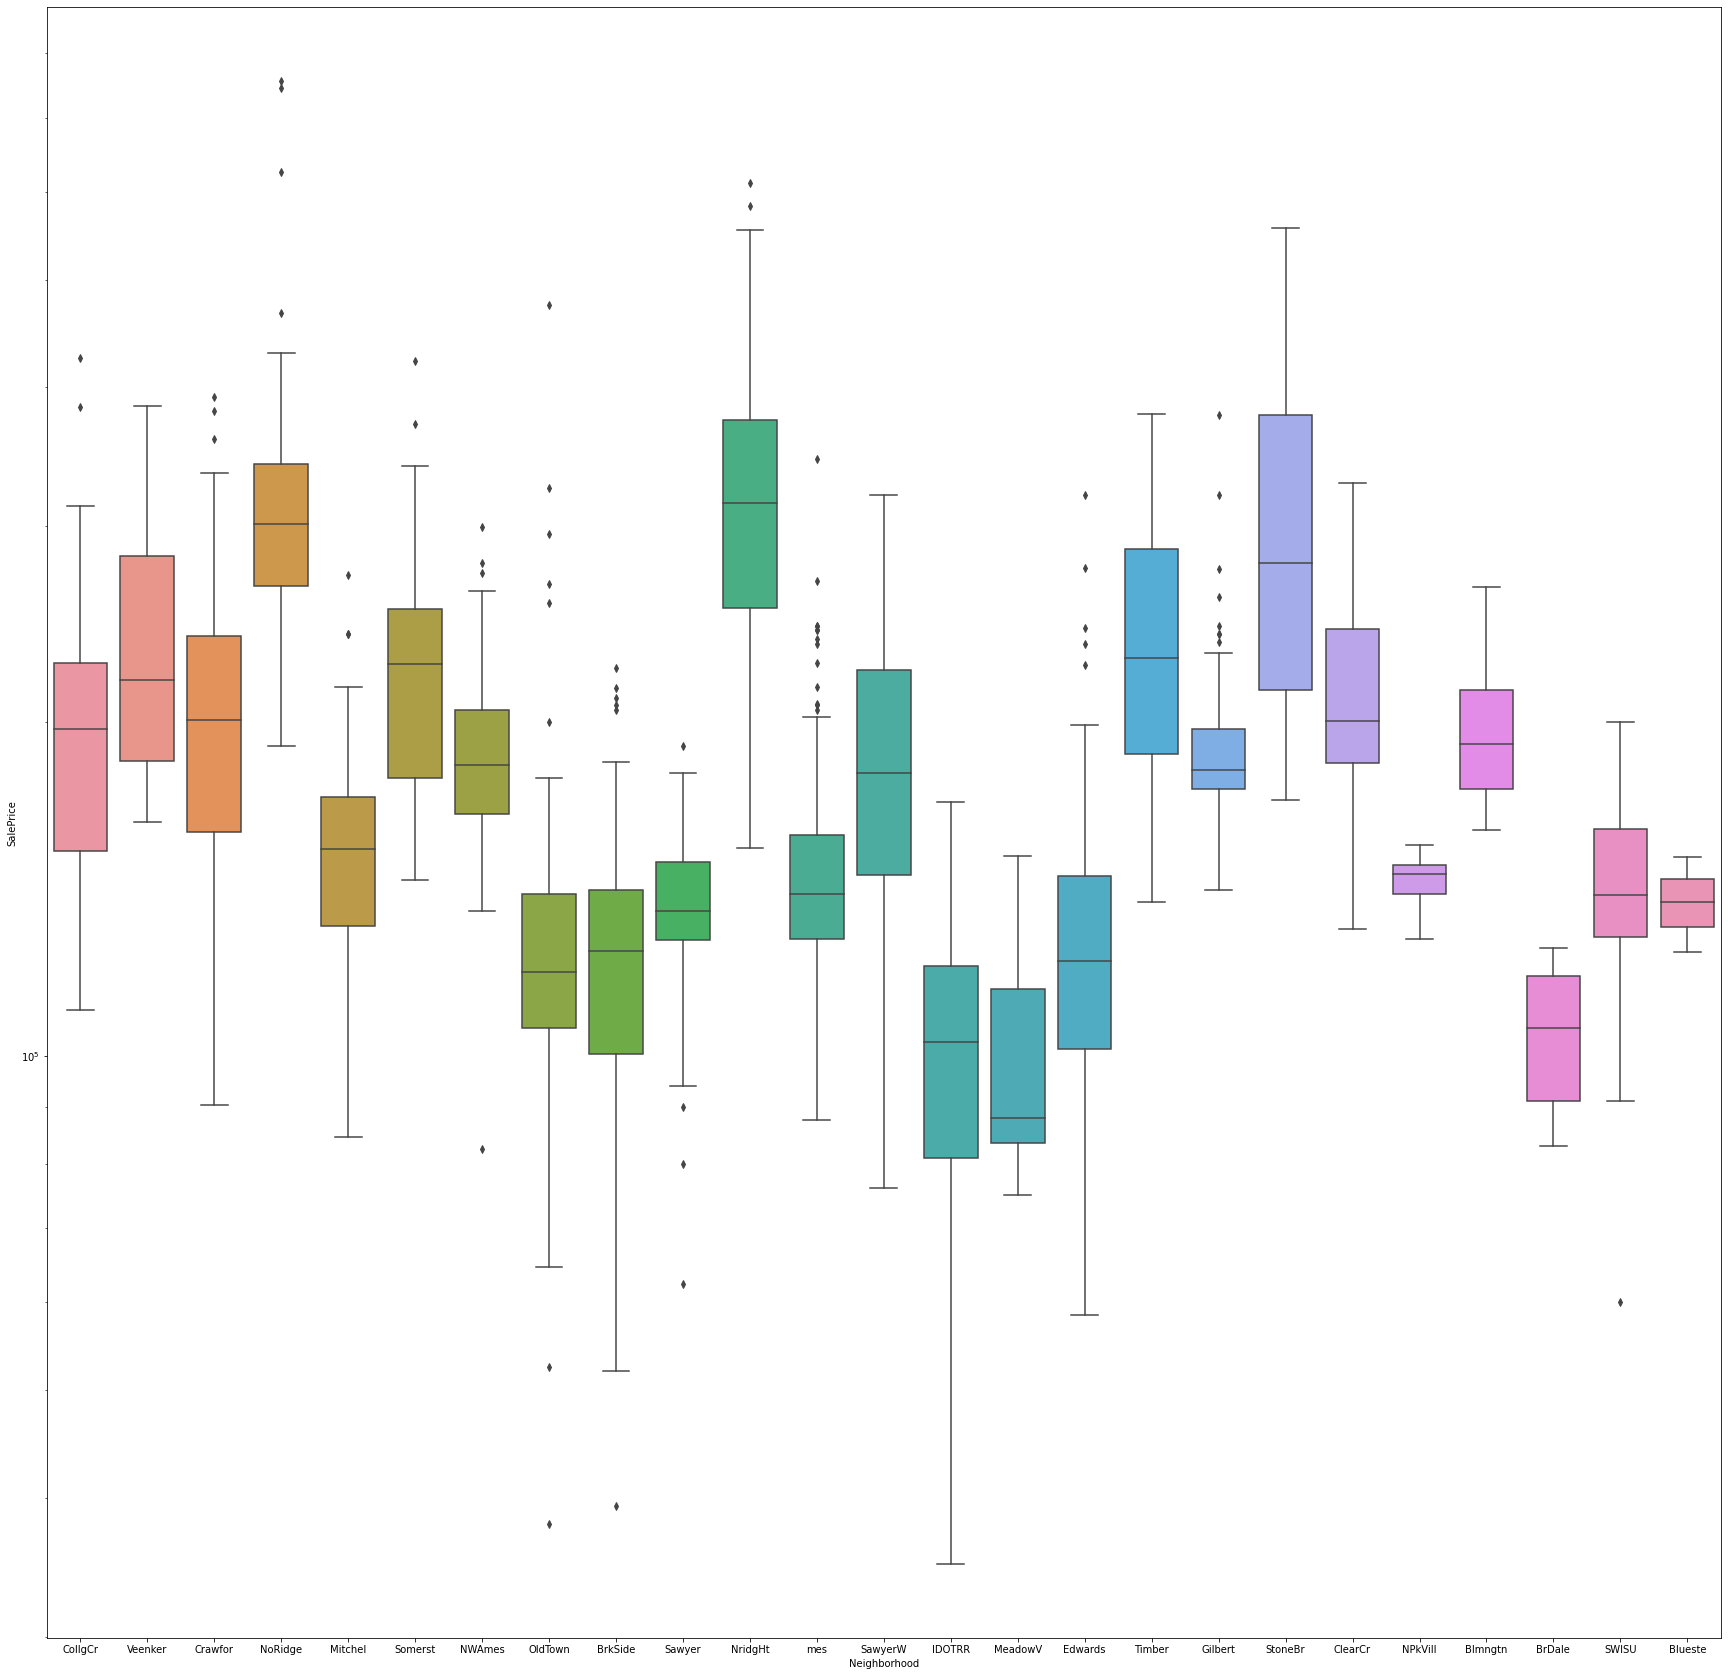

In [100]:
plt.figure(figsize=(30,30))
sns.boxplot(data=df9, y="SalePrice", x="Neighborhood")
plt.semilogy()

[]

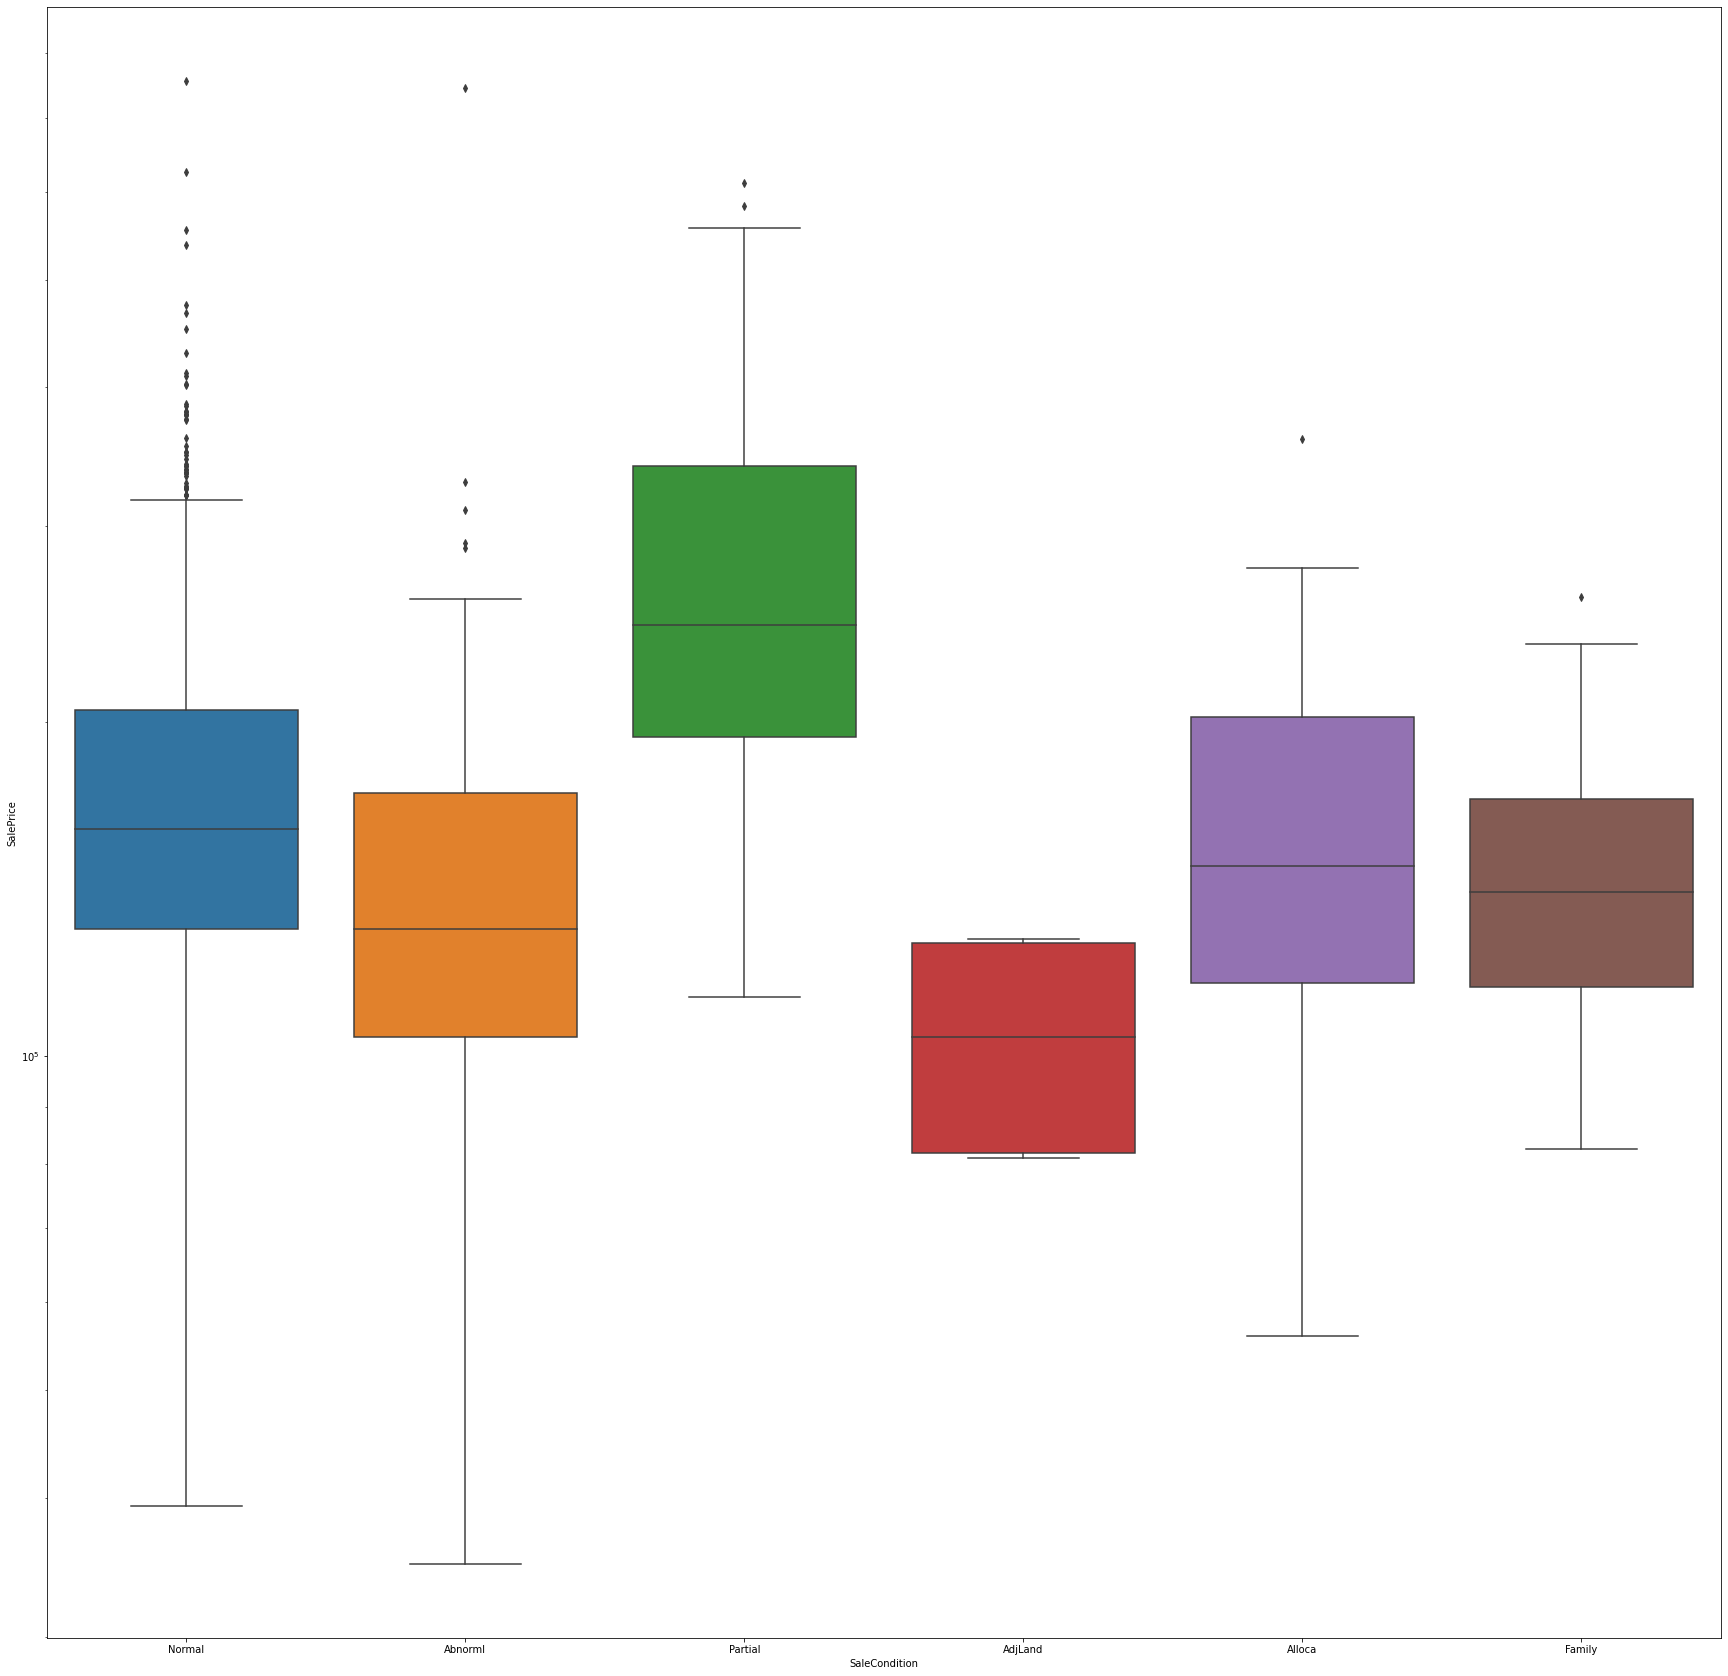

In [101]:
plt.figure(figsize=(30,30))
sns.boxplot(data=df9, y="SalePrice", x="SaleCondition")
plt.semilogy()

<AxesSubplot:xlabel='GarageQual', ylabel='SalePrice'>

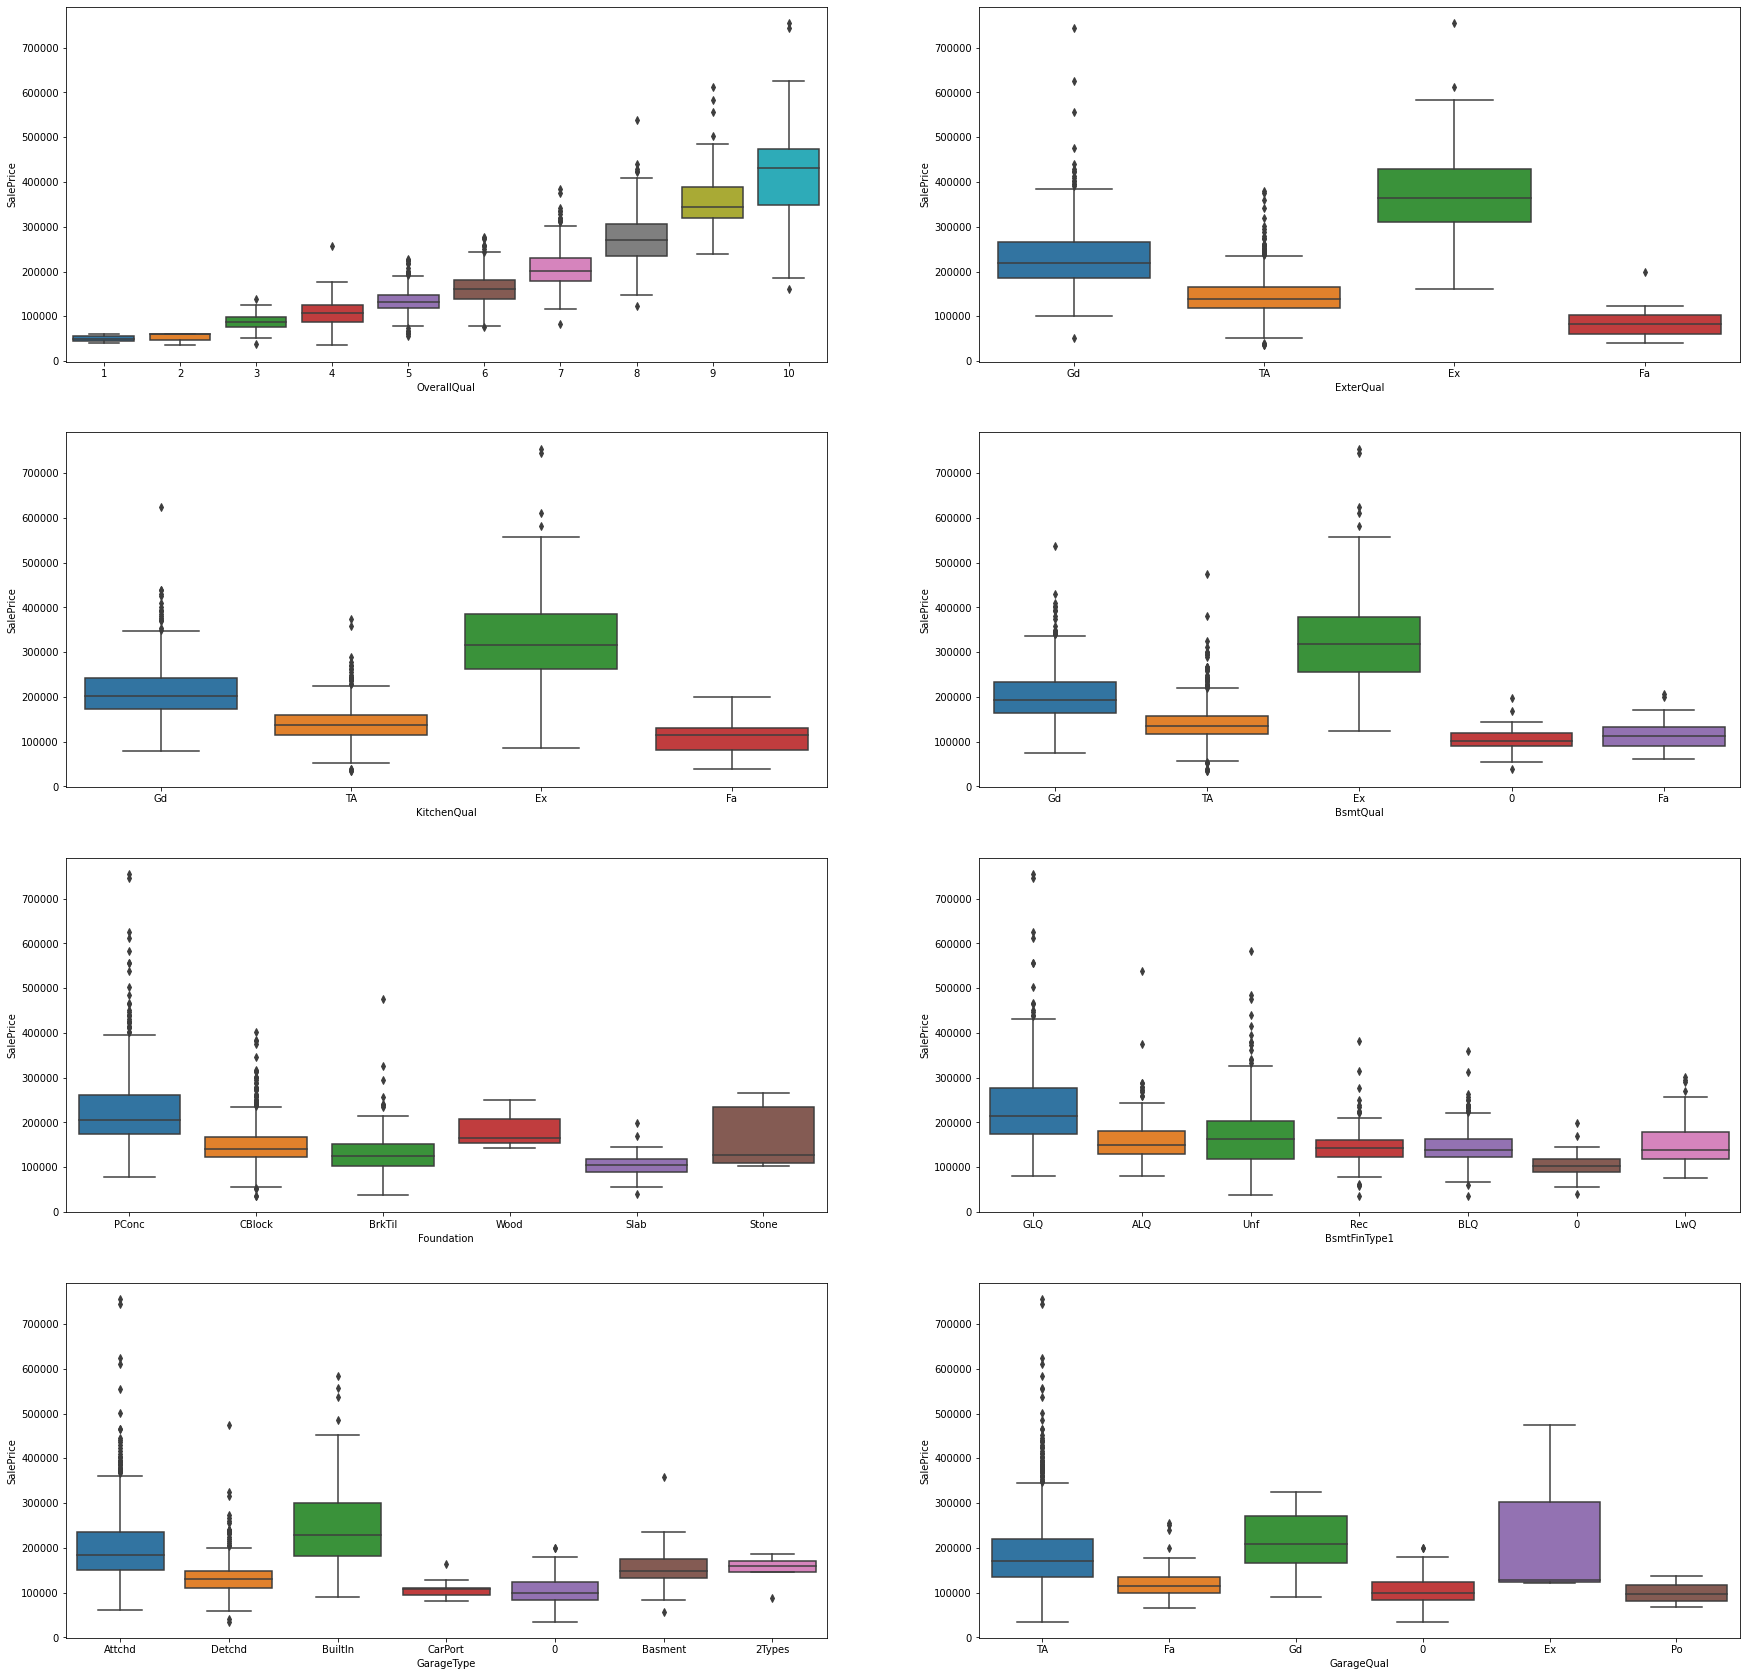

In [102]:
plt.figure(figsize=(30,30))
plt.subplot(4,2,1)
sns.boxplot(data=df9, y="SalePrice", x="OverallQual")
plt.subplot(4,2,2)
sns.boxplot(data=df9, y="SalePrice", x="ExterQual")
plt.subplot(4,2,3)
sns.boxplot(data=df9, y="SalePrice", x="KitchenQual")
plt.subplot(4,2,4)
sns.boxplot(data=df9, y="SalePrice", x="BsmtQual")
plt.subplot(4,2,5)
sns.boxplot(data=df9, y="SalePrice", x="Foundation")
plt.subplot(4,2,6)
sns.boxplot(data=df9, y="SalePrice", x="BsmtFinType1")
plt.subplot(4,2,7)
sns.boxplot(data=df9, y="SalePrice", x="GarageType")
plt.subplot(4,2,8)
sns.boxplot(data=df9, y="SalePrice", x="GarageQual")

""" There are outliers present on both sides for significant categorical variables"""

# Inference: 
The Target Variable SalePrice found positively skewed because of:
1) OverallQual which is rated very excellent has a median shifted to higher side.
2) The exterqual, kitchenqual, basementqual, which are rated excellent are sold at higher sale price.
3) The Foundation of Poured Concrete found sold at higher sale price.
   Those made up of stone has a median shifted to lower side and the data is positively skewed which is required to be worked upon to avoid such values with positive skewness and lower    
   median.
4) Basement with good living quarters are sold most but the median is at lower side.
5) Attached to home and Builtin Garage types are sold most but the median is at lowers side and values are poitively skewed.
6) Typical Garage has many outliers. Excellent Garage Qual are sold most but the median is found to be at extreme lower.
   The sale price with respect to garage qual shall be reconsidered.
7) Partial Sales don't represent actual market values and adjoining land purchase are at lower values.
8) Very large house prices relatively appropriate.
9) For the sale price in neighbourhood: living area std. dev., lot size std. dev. shall be taken into consideration.